# Approximation polynomiale d'un ensemble de points par la méthode des moindres carrés

Avant d'aller dans le vif du sujet, nous rappelons que dasn le chapitre sur l'interpolation polynomiale on avait n+1 points, et on savait qu'avec des x distincts on pouvait ressortir un polynome uinque d'ordre n qui allait passer par tous les points (x,y)  et c'est ainsi donc qu'on trouvait une equation qui passait obligatoirement par tous ces points. 



In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

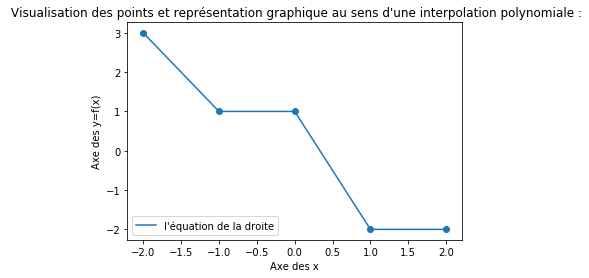

In [19]:
#points
x=[-2,-1,0,1,2]
y=[3,1,1,-2,-2]  
#représentation graphique du nuage
plt.scatter(x,y)
#représentation graphique de la droite de l'équation passant par ces points
plt.plot(x,y,label="l'équation de la droite")
#rendu graphique
plt.legend(loc="lower left")
plt.xlabel("Axe des x")   
plt.ylabel("Axe des y=f(x)")
plt.title(" Visualisation des points et représentation graphique au sens d'une interpolation polynomiale :")
plt.show()

### La paradigme de l'approximation d'un polynome par la méthode des moindres carrés :

Cette approche stipule que le polynome ne passe pas forcément par tous les points, mais qu'en revanche il faudrait aussi veiller à ce qu'il (le polynome) soit d'un ordre k inférieur à n. Daileurs, nois sommes tous sans ignorer qu'il n'est pas possible d'avoir un polynome d'ordre inférieur à n qui puisse passer par tous les points.

Donc ici, on peut se contenter d'avoir une représentation d'un polynome qui passe << au plus prêt >> des points.

Et pour y arriver on va minimiser un carré, on utilisera alors le critère des moindres carrés vu au cours.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#voici une approxiamtion polynomiale par la méthode de moindre carré 
#uniquement dans le cas où k=2
def approximationPolyMC(M,N):
    #
    x=np.array(M)
    print("Nos abscisses : ")
    print(x)
    #
    y=np.array(N)    
    print("Nos ordonnées : ")
    print(y)
    #affichons nos points
    plt.scatter(x,y)
    plt.xlabel("Axe des x")
    plt.ylabel("Axe des y=f(x)")
    plt.title(" Visualisation des points et représentation graphique des polynomes :")
    #
    X=np.ones((5,3))
    X[:,1]=x
    X[:,2]=x**2
    print(" X : ")
    print(X)
    #
    A=np.zeros(len(X))
    A=X.T@X
    print(" A=X.T@X : ")
    print(A)
    #
    b=X.T@y
    print(" b=X.T@y: ")
    print(b)
    #
    theta=np.linalg.solve(A,b)
    print("les paramètres theta sont : ")
    print(theta)
    #
    #Nous voulons définir la portée de la représentation dans le plan
    ppn=0 #plus petit nombre
    pgn=1 #plus grand nombre
    for i in range(len(x)):
        if x[i]<ppn:
            ppn=x[i]
        elif x[i]>pgn:
            pgn=x[i]
    for j in range(len(y)):
        if x[i]<ppn:
            ppn=x[i]
        elif x[i]>pgn:
            pgn=x[i]
    #Affichons l'équation de la droite
    xx=np.linspace(ppn,pgn,50)
    yy= 1/5 - 13*xx/10
    plt.plot(xx,yy)   
    #
    #Affichons la courbe
    yy=theta[0]+theta[1]*xx+theta[2]*xx**2
    plt.plot(xx,yy)
    #
    plt.show()

Nos abscisses : 
[-2 -1  0  1  2]
Nos ordonnées : 
[ 3  1  1 -2 -2]
 X : 
[[ 1. -2.  4.]
 [ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]]
 A=X.T@X : 
[[  5.   0.  10.]
 [  0.  10.   0.]
 [ 10.   0.  34.]]
 b=X.T@y: 
[  1. -13.   3.]
les paramètres theta sont : 
[ 0.05714286 -1.3         0.07142857]


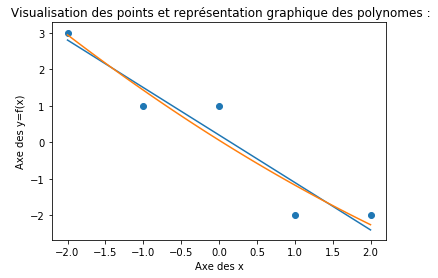

10000000 loops, best of 3: 28.8 ns per loop


In [23]:
x=[-2,-1,0,1,2]
y=[3,1,1,-2,-2]  
approximationPolyMC(x,y)
%timeit()

## Commentaires :

###    1) représentations des points :
étant donné la forme que prend ce nuage de point, on peut dire qu'il existe une liaison entre X et Y et cette laison est négative car VISIBLEMENT, quand X croît, Y décroît ... nous l'aurions compris, inversement. En statistique on dira que le coefficient de corrélation r (qui permet de mesurer l'intensité de cette liaison) est négatif (r < 0).

###    2) représentation de l'équation de la droite y=f(x) avec f(x)=ax+b :
Il semble que cette droite ets la meilleure qui approxime l'ensemble des points, de plus notre principe est respecté, elle ne passe pas forcément par tous les points.

###    3) représentationd de la courbe :
du fait que le coefficient en x[2] est petit, on remarque difficilement que c'est la parabole masi néanmoins je peux en déduire que les écarts positis et négatifs de la courbe se compensent légèrement car elle(la courbe) se rapproche realtivement de la droite.


### 4) le principe de cette  méthode :

Le but de cette partie est de nous aider à trouver le meilleur ajustement des données c'est à dire la fonction f(x) la plus satisfaisante lors des observations des données et qui puisse nous conduire à une courbe d'ajustement aussi simple que possible tel qu evu au cours. L'avanatage du principe ou de la méthode de moindre caré se situe au niveaux de la compensation, en effet après avoir calculé les écarts dont il est question on obtiendra des écarts positifs et d'autres négatifs,  celle-ci par le critère des moindres carrées concistera à élever au carré les écarts afin de ne se retrouver qu'avec ddes écarts positifs.